In [1]:
import requests

In [2]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{stock_symbol}/prices?'
    token = '387fd657063535f02ef5a5700aadd0b9286572e9'
    payload = {
        'startDate': start_date,
        'endDate': end_date,
        'token': token
    }
    response = requests.get(base_url, params=payload)
    return response

In [3]:
response = get_stock_data('AAPL', '2019-1-1', '2019-5-2')
print(response.url)
print(response.json)

https://api.tiingo.com/tiingo/daily/AAPL/prices?startDate=2019-1-1&endDate=2019-5-2&token=387fd657063535f02ef5a5700aadd0b9286572e9
[{'date': '2019-01-02T00:00:00.000Z', 'close': 157.92, 'high': 158.85, 'low': 154.23, 'open': 154.89, 'volume': 37039737, 'adjClose': 154.7924858042, 'adjHigh': 155.7040676925, 'adjLow': 151.1755641185, 'adjOpen': 151.8224932005, 'adjVolume': 37039737, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-01-03T00:00:00.000Z', 'close': 142.19, 'high': 145.72, 'low': 142.0, 'open': 143.98, 'volume': 91312195, 'adjClose': 139.3740093497, 'adjHigh': 142.8340997429, 'adjLow': 139.1877721897, 'adjOpen': 141.1285594358, 'adjVolume': 91312195, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-01-04T00:00:00.000Z', 'close': 148.26, 'high': 148.5499, 'low': 143.8, 'open': 144.53, 'volume': 58607070, 'adjClose': 145.323796513, 'adjHigh': 145.6079552113, 'adjLow': 140.9521242316, 'adjOpen': 141.6676670041, 'adjVolume': 58607070, 'divCash': 0.0, 'splitFactor': 1.0}, {'

In [5]:
def parse_data(data_response):
    json_data = data_response.json()
    dates = []
    closes = []
    opens = []
    highs = []
    lows = []
    vols = []
    
    for json_object in json_data:
        dates.append(json_object['date'])
        closes.append(json_object['close'])
        opens.append(json_object['open'])
        highs.append(json_object['high'])
        lows.append(json_object['low'])
        vols.append(json_object['volume'])
        
    return dates, closes, opens, highs, lows, vols 

In [6]:
dates, closes, opens, highs, lows, vols = parse_data(response)
print(dates)

['2019-01-02T00:00:00.000Z', '2019-01-03T00:00:00.000Z', '2019-01-04T00:00:00.000Z', '2019-01-07T00:00:00.000Z', '2019-01-08T00:00:00.000Z', '2019-01-09T00:00:00.000Z', '2019-01-10T00:00:00.000Z', '2019-01-11T00:00:00.000Z', '2019-01-14T00:00:00.000Z', '2019-01-15T00:00:00.000Z', '2019-01-16T00:00:00.000Z', '2019-01-17T00:00:00.000Z', '2019-01-18T00:00:00.000Z', '2019-01-22T00:00:00.000Z', '2019-01-23T00:00:00.000Z', '2019-01-24T00:00:00.000Z', '2019-01-25T00:00:00.000Z', '2019-01-28T00:00:00.000Z', '2019-01-29T00:00:00.000Z', '2019-01-30T00:00:00.000Z', '2019-01-31T00:00:00.000Z', '2019-02-01T00:00:00.000Z', '2019-02-04T00:00:00.000Z', '2019-02-05T00:00:00.000Z', '2019-02-06T00:00:00.000Z', '2019-02-07T00:00:00.000Z', '2019-02-08T00:00:00.000Z', '2019-02-11T00:00:00.000Z', '2019-02-12T00:00:00.000Z', '2019-02-13T00:00:00.000Z', '2019-02-14T00:00:00.000Z', '2019-02-15T00:00:00.000Z', '2019-02-19T00:00:00.000Z', '2019-02-20T00:00:00.000Z', '2019-02-21T00:00:00.000Z', '2019-02-22T00:00:0

In [7]:
# TODO: migrate the response to be written to a class rather than lists

## Building Datasets

In [17]:
def calculate_price_difference(opens, closes):
    price_differences = []
    for i in range(len(opens) - 1):
        if opens[i + 1] >= closes[i]:
            price_differences.append([1, 0])
        else:
            price_differences.append([0, 1])
    return price_differences

In [19]:
price_differences = calculate_price_difference(opens, closes)
differences = []
for difference in price_differences:
    differences.append(difference[0])

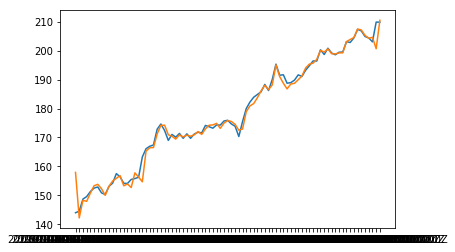

In [20]:
import matplotlib.pyplot as plt

plt.plot(dates[1:], opens[1:])
plt.plot(dates[1:], closes[:-1])
plt.show()

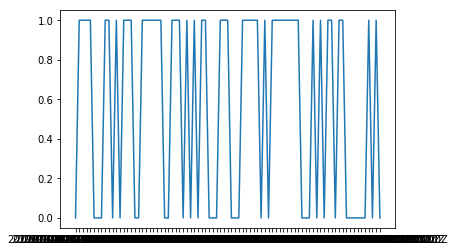

In [21]:
plt.plot(dates[1:], differences)
plt.show()

In [24]:
def create_datasets(stock_symbol, start_date, end_date):
    response = get_stock_data(stock_symbol, start_date, end_date)
    dates, closes, opens, highs, lows, vols = parse_data(response)
    
    labels = calculate_price_difference(opens, closes)
    
    inputs = []
    for i in range(len(labels)):
        inputs.append([closes[i], opens[i], highs[i], lows[i], vols[i]/1000])
    
    return inputs, labels

In [45]:
x_train, y_train = create_datasets('MSFT', '2019-1-1', '2019-4-1')
x_test, y_test = create_datasets('MSFT', '2019-4-1', '2019-5-2')

## Building Model

In [39]:
# y = m*x + b
import tensorflow as tf

In [46]:
x_input = tf.placeholder(dtype=tf.float32, shape=[None, 5]) # the None allows the first variable to be any size
y_input = tf.placeholder(dtype=tf.float32, shape=[None, 2])
m = tf.Variable(initial_value=tf.ones(shape=[5, 2])) # use ones as otherwise you get dead neurons
b = tf.Variable(initial_value=tf.ones(shape=[2])) # matches the number of encoding outputs
y_output = tf.add(tf.matmul(x_input, m), b) # order is important here

In [47]:
loss = tf.reduce_sum(
    tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(
            labels=y_input, logits=y_output
        )
    )
)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(loss)

## Training and Testing the Model

In [48]:
def measure_accuracy(actual, expected):
    num_correct = 0
    for i in range(len(actual)):
        actual_value = actual[i]
        expected_value = expected[i]
        if actual_value[0] >= actual_value[1] and expected_value[0] >= expected_value[1]:
            num_correct += 1
        elif actual_value[0] <= actual_value[1] and expected_value[0] <= expected_value[1]:
            num_correct += 1
    return num_correct / len(actual) * 100

In [49]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [50]:
for _ in range(20000):
    session.run(train_step, feed_dict={x_input:x_train, y_input:y_train})
print(measure_accuracy(session.run(y_output, feed_dict={x_input:x_test}), y_test))

77.27272727272727


### Ways to improve accuracy
- Change the amount of epochs
- Change the optimizer being used
- Change the variable inside the optimizer used

## SHOULDN'T USE ANYTHING WITH AN ACCURACY SCORE LOWER THAN 80-90%